In [1]:
import pandas as pd
import itertools
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils.vis_utils import plot_model
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import time

In [2]:
X_train = pd.read_csv ('C:\\Users\\Wassim\\Desktop\\Github Projects\\Network Intrusion Detection\\dataset\\OneHotEncoder_scaled_train.csv')
X_test = pd.read_csv ('C:\\Users\\Wassim\\Desktop\\Github Projects\\Network Intrusion Detection\\dataset\\OneHotEncoder_scaled_test.csv')
Y_train = pd.read_csv ('C:\\Users\\Wassim\\Desktop\\Github Projects\\Network Intrusion Detection\\dataset\\Y_train.csv')
Y_test = pd.read_csv ('C:\\Users\\Wassim\\Desktop\\Github Projects\\Network Intrusion Detection\\dataset\\Y_test.csv')

X_train = X_train[['duration', 'src_bytes', 'dst_bytes', 'hot', 'logged_in', 'count',
      'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
      'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
      'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
      'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
      'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
      'dst_host_serror_rate', 'dst_host_srv_serror_rate',
          'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
          'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp',
          'service_type_domain_u', 'service_type_eco_i', 'service_type_http',
          'service_type_private', 'service_type_smtp', 'flag_type_RSTR',
          'flag_type_S0', 'flag_type_SF']]



#test
X_test = X_test[['duration', 'src_bytes', 'dst_bytes', 'hot', 'logged_in', 'count',
      'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
      'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
      'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
      'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
      'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
      'dst_host_serror_rate', 'dst_host_srv_serror_rate',
      'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
      'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp',
      'service_type_domain_u', 'service_type_eco_i', 'service_type_http',
      'service_type_private', 'service_type_smtp', 'flag_type_RSTR',
      'flag_type_S0', 'flag_type_SF']]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
enc = OneHotEncoder()#instanciation
Y_train = enc.fit_transform(Y_train)
Y_train = pd.DataFrame(Y_train.toarray(), columns = ['Dos','normal','probe','r2l','u2r'])

enc = OneHotEncoder()#instanciation
Y_test = enc.fit_transform(Y_test)
Y_test = pd.DataFrame(Y_test.toarray(), columns = ['Dos','normal','probe','r2l','u2r'])

# Dense Model

Model Construction ...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1152      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (Non

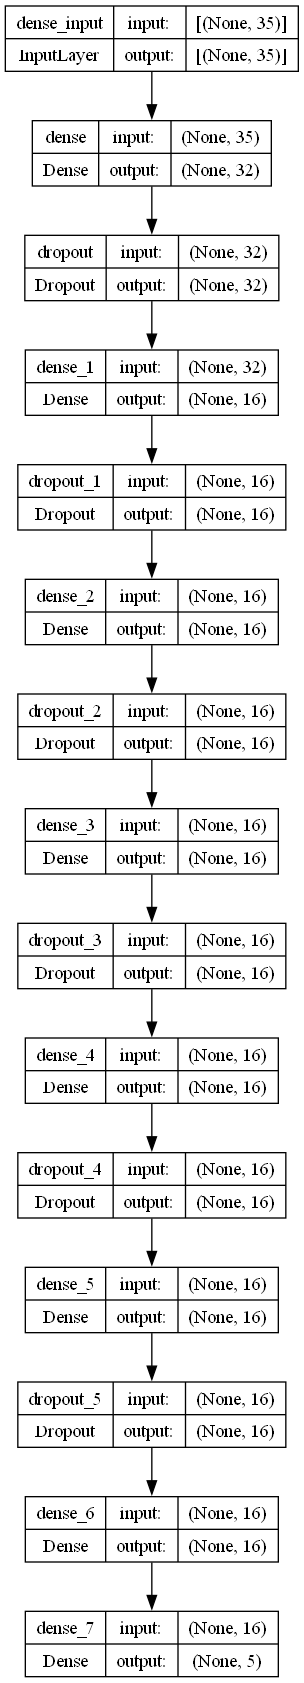

In [4]:
print("Model Construction ...")

model = Sequential()
model.add(Dense(32, input_dim = 35, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print("------  Cross Validation (Stratified K-Fold)  --------")

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

X = X_train
Y = Y_train
X = X.to_numpy()
Y = Y.to_numpy()

predicted_targets = np.array([])
actual_targets = np.array([])
accuracies_array = np.array([])
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=200)

# Cross validation

for i, (train_index, test_index) in enumerate(skf.split(X, Y.argmax(1))):
  print("Fold {} ...".format(i))
  X_train_temp, X_test_temp = X[train_index], X[test_index]
  Y_train_temp, Y_test_temp = Y[train_index], Y[test_index]

  start_training_time = time.time()
  model.fit(X_train_temp, Y_train_temp, epochs=5, verbose=0, batch_size=32)
  print("Training time for fold {} = {:.3f} Seconds".format(i, time.time() - start_training_time))
  accuracy = model.evaluate(X_test_temp, Y_test_temp, verbose=0)
  print("Accuracy for fold {} = {} ".format(i, accuracy[1]))
  predicted_labels = model.predict(X_test_temp)
  predicted_labels = np.argmax(predicted_labels, axis=1)
  Y_test_temp = np.argmax(Y_test_temp, axis=1)

  accuracies_array = np.append(accuracies_array, accuracy[1])
  predicted_targets = np.append(predicted_targets, predicted_labels)
  actual_targets = np.append(actual_targets, Y_test_temp)


------  Cross Validation (Stratified K-Fold)  --------
Fold 0 ...
Training time for fold 0 = 25.144 Seconds
Accuracy for fold 0 = 0.9456089735031128 
512/512 [==============================] - 0s 761us/step
Fold 1 ...
Training time for fold 1 = 26.374 Seconds
Accuracy for fold 1 = 0.9506813883781433 
512/512 [==============================] - 0s 706us/step
Fold 2 ...
Training time for fold 2 = 26.303 Seconds
Accuracy for fold 2 = 0.9481757879257202 
512/512 [==============================] - 0s 672us/step
Fold 3 ...
Training time for fold 3 = 25.102 Seconds
Accuracy for fold 3 = 0.9291040301322937 
512/512 [==============================] - 0s 699us/step
Fold 4 ...


In [ ]:
# Generation of the confusion matrix (non-normalized)
confusion_mat = confusion_matrix(actual_targets, predicted_targets)
plt.figure()
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title("Non-normalized Confusion Matrix")

classes = ['Dos', 'Normal', 'Probe', 'R2L', 'U2R']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes, rotation=45)

thresh = confusion_mat.max() / 2
for i, j in itertools.product(range(confusion_mat.shape[0]), range(confusion_mat.shape[1])):
    plt.text(j, i, format(confusion_mat[i, j], 'd'), horizontalalignment="center", color="white" if confusion_mat[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print(accuracies_array)
print(accuracies_array.mean())


In [ ]:
# Generation of the normalized confusion matrix
confusion_mat = confusion_matrix(actual_targets, predicted_targets)
confusion_mat = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]
plt.figure()
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title("Normalized Confusion Matrix")

classes = ['Dos', 'Normal', 'Probe', 'R2L', 'U2R']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes, rotation=45)

thresh = confusion_mat.max() / 2
for i, j in itertools.product(range(confusion_mat.shape[0]), range(confusion_mat.shape[1])):
    plt.text(j, i, format(confusion_mat[i, j], '.4f'), horizontalalignment="center", color="white" if confusion_mat[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print(accuracies_array)
print("Minimum model accuracy: {}".format(min(accuracies_array)))
print("Maximum model accuracy: {}".format(max(accuracies_array)))
print("Average model accuracy: {}".format(accuracies_array.mean()))

# Generation of metrics
print(classification_report(actual_targets, predicted_targets))

In [ ]:
print("---------- Test ----------")
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()
predicted_targets = model.predict(X_test, verbose=1)
loss, accuracy = model.evaluate(X_test, Y_test, verbose=1)
actual_targets = Y_test
actual_targets = np.argmax(actual_targets, axis=1)
predicted_targets = np.argmax(predicted_targets, axis=1)
print("Loss: {} Accuracy: {}".format(loss, accuracy))

In [ ]:
# Generation of the normalized confusion matrix for test data
confusion_mat = confusion_matrix(actual_targets, predicted_targets)
confusion_mat = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]
plt.figure()
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title("Normalized Confusion Matrix")

classes = ['Dos', 'Normal', 'Probe', 'R2L', 'U2R']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes, rotation=45)

thresh = confusion_mat.max() / 2
for i, j in itertools.product(range(confusion_mat.shape[0]), range(confusion_mat.shape[1])):
    plt.text(j, i, format(confusion_mat[i, j], '.4f'), horizontalalignment="center", color="white" if confusion_mat[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print(accuracies_array)
print("Minimum model accuracy: {}".format(min(accuracies_array)))
print("Maximum model accuracy: {}".format(max(accuracies_array)))
print("Average model accuracy: {}".format(accuracies_array.mean()))

# Generation of metrics
print(classification_report(actual_targets, predicted_targets))

In [ ]:
# Generation of the non-normalized confusion matrix for test data
confusion_mat = confusion_matrix(actual_targets, predicted_targets)
plt.figure()
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title("Non-normalized Confusion Matrix")

classes = ['Dos', 'Normal', 'Probe', 'R2L', 'U2R']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes, rotation=45)

thresh = confusion_mat.max() / 2
for i, j in itertools.product(range(confusion_mat.shape[0]), range(confusion_mat.shape[1])):
    plt.text(j, i, format(confusion_mat[i, j], 'd'), horizontalalignment="center", color="white" if confusion_mat[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()